Welcome to machine learning project! It focuses on building a regression model to predict the prices of laptops based on their specifications. The data was collected data from a website and will use it to train a model where the independent variables are the laptop specs, and the dependent variable is the price. Our goal is to create a model that accurately predicts the price of a new laptop based on its specs. This will help businesses make informed decisions about pricing and inventory. We will explore, preprocess it, select a suitable regression model, train and evaluate the model, and fine-tune it to achieve the best results.


#Required Libraries


In [1]:
!pip install fuzzywuzzy
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filena

In [16]:
from fuzzywuzzy import fuzz
import requests
from bs4 import BeautifulSoup
import bs4
import csv
import time
from random import uniform
import numpy as np
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from google.colab import drive
from statsmodels.graphics.gofplots import qqplot
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Komputronik/Komputronik_prices
from notebook_scraper_pr import Notebook_Scraper, get_gpu_scores

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Komputronik/Komputronik_prices


# Notebook_Scraper class

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import csv
# import time
# from random import uniform
# import numpy as np

# class Notebook_Scraper:
#     """
#     A class representing a Notebook_Scraper object.
    
#     Methods:
#     - __init__(self, url: str): Initializes a new Notebook_Scraper object with the given url and full_details_list list.
#     - scrape(self): Get notebook details from self.url. Returns a list of dicts with notebook details.
#     - save_data(self, data: list): Saves the list of dicts with notebooks details to a file.
#     - open_data(self, data_csv_name_file)->list: Opens a csv file with dicts with notebooks details. Returns a list of dicts with notebooks details.
#     """

#     def __init__(self, url):
#         self.url = url
#         self.full_details_list = []

#     def scrape(self) ->list :
#         """
#         Get notebook details from self.url.

#         Returns:
#           List of dicts with notebook details.
#         """
#         response = requests.get(self.url)
#         content = response.content
#         soup = BeautifulSoup(content, 'html.parser')

#         self.last_page = int(soup.find_all('li', {
#             'class': 'flex justify-center items-center w-8 h-8 rounded border border-gray-mercury cursor-pointer'})[
#                             -1].get_text())

#         for page in range(1, self.last_page + 1):
#             url = f'https://www.komputronik.pl/category/5022/laptopy.html?showBuyActiveOnly=0&p={page}'

#             time.sleep(uniform(1.5, 2.5))
#             response = requests.get(url)
#             content = response.content

#             soup = BeautifulSoup(content, 'html.parser')

#             # for item in soup.find('div', {'class': 'tests-product-entry'}):
#             #   print(item.find('div',{'class': 'py-1'}))

#             for item in soup.find_all('div', {'class': 'tests-product-entry'}):

#                 notebook_dict = {}
#                 try:
#                     price = item.find('div', {'class': 'text-3xl font-bold leading-8'}).get_text().replace('zł',
#                                                                                                            '').replace(
#                         ' ', '').replace('\\xa', '').strip()
#                 except:
#                     price = np.nan

#                 notebook_dict['price'] = float(price.replace(u'\xa0', '').replace(',', '.'))

#                 for detail in item.find_all('div', {'class': 'py-1'}):
#                     if detail.find('span') == None:
#                         pass
#                     else:
#                         try:
#                             key_lap = detail.find('span').text.strip()
#                         except:
#                             continue
#                         try:
#                             value_lap = detail.find(class_='font-semibold').text.strip()
#                         except:
#                             value_lap = np.nan
#                         notebook_dict[key_lap] = value_lap
#                 self.full_details_list.append(notebook_dict)

#         return self.full_details_list

#     def save_data(self, data: list, file_name: str):
#         """
#           Saves the list of dicts with notebooks details to a file.

#           Args:
#               data: a list of dicts.

#               file_name: a name of a file to be saved. Can pass directory with it.

#         """
#         with open(file_name, 'w', encoding='UTF8', newline='') as handler:
#             writer = csv.writer(handler)
#             for item in data:
#                 writer.writerow([item])

#     def open_data(self, data_csv_name_file)->list:
#         """
#            Opens a csv file with laptops details dicts.

#           Args:
#               data_csv_name_file: a file name with a file extension. If needed pass directory with it.

#           Returns:
#               List of dicts with notebook details.
#         """
#         self.full_details_list = []
#         with open(f'{data_csv_name_file}', 'r') as handler:
#             reader = csv.reader(handler)
#             for it in reader:
#                 res = eval(it[0].replace("'", '"'))
#                 self.full_details_list.append(res)
#         return self.full_details_list

#Scraping

In [5]:
notebooks = Notebook_Scraper('https://www.komputronik.pl/category/5022/laptopy.html?showBuyActiveOnly=0&p=1')

In [ ]:
notebook_data = notebooks.scrape()

In [ ]:
notebooks.save_data(notebook_data, 'full_data.csv')

In [6]:
notebook_data = notebooks.open_data('full_data.csv')

#Raw data analysis

The following data shows that there is no missing data for the independent data price, operating system, RAM size, and SSD capacity. In contrast, the other independent values are clearly missing. 

describe() method describes only the dependent variable, since this is the only value that takes numeric values. The maximum price slightly exceeds 30 thousand zlotys, and the average and mean values fluctuate in the range of 5 thousand zlotys. The obtained results indicate that the collected data for the price variable is not characterized by data of concern. 

In [7]:
df = pd.DataFrame(notebook_data)

In [ ]:
df.sample(5)

price  price_no_sale System operacyjny: Rodzaj laptopa:  \
3121  3649.00        3649.00     Windows 11 Pro         do domu   
1633  2164.79        2164.79    Windows 11 Home         do domu   
1212  2549.00        2549.00    Windows 11 Home         do domu   
1425  5490.00        5490.00    Windows 11 Home         do gier   
1323  8990.00        8990.00     Windows 11 Pro       biznesowy   

                     Rozdzielczość: Typ procesora: Wielkość pamięci RAM:  \
3121       1600 x 900 (HD+) pikseli  Intel Core i5                 12 GB   
1633  1920 x 1080 (Full HD) pikseli  Intel Core i5                  8 GB   
1212  1920 x 1080 (Full HD) pikseli    AMD Ryzen 5                  8 GB   
1425  1920 x 1080 (Full HD) pikseli  Intel Core i7                 32 GB   
1323  1920 x 1080 (Full HD) pikseli  Intel Core i5                 16 GB   

     Pojemność dysku SSD:                       Karta graficzna:    Waga:  \
3121               500 GB                 Intel Iris Xe Graphics   2.1 kg   
1633               512 GB                 Intel Iris Xe Graphics  1.65 kg   
1212              1000 GB                    AMD Radeon Graphics  1.69 kg   
1425              1000 GB  NVIDIA Geforce RTX 3050 Ti Laptop GPU      NaN   
1323               512 GB                 Intel Iris Xe Graphics   1.8 kg   

                    CPU:  Marka: Podświetlana klawiatura: Wbudowany modem:  \
3121      Core i5-1135G7  Lenovo                      NaN              NaN   
1633     Core i5-1135G7   Lenovo                      NaN              NaN   
1212  AMD Ryzen 5 5625U       HP                      NaN              NaN   
1425       Corei7-11800H     MSI                      NaN              NaN   
1323      Core i5-1245U     DELL                      NaN              NaN   

     Przekątna ekranu: Pojemność dysku SSD 2: Pojemność dysku SSD 3:  \
3121               NaN                    NaN                    NaN   
1633               NaN                    NaN                    NaN   
1212               NaN                    NaN                    NaN   
1425               NaN                 960 GB                    NaN   
1323               NaN                    NaN                    NaN   

     Seria procesora:  
3121              NaN  
1633              NaN  
1212              NaN  
1425              NaN  
1323              NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     3482 non-null   float64
 1   price_no_sale             3482 non-null   float64
 2   System operacyjny:        3482 non-null   object 
 3   Rodzaj laptopa:           3479 non-null   object 
 4   Rozdzielczość:            3465 non-null   object 
 5   Typ procesora:            3481 non-null   object 
 6   Wielkość pamięci RAM:     3482 non-null   object 
 7   Pojemność dysku SSD:      3481 non-null   object 
 8   Karta graficzna:          3424 non-null   object 
 9   Waga:                     833 non-null    object 
 10  CPU:                      3482 non-null   object 
 11  Marka:                    3482 non-null   object 
 12  Podświetlana klawiatura:  1904 non-null   object 
 13  Wbudowany modem:          42 non-null     object 
 14  Przekątn

In [ ]:
def explore_data_regression(dataset_file, target_column_name):
    # Examine the data
    missing_values = dataset_file.isnull().sum()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.title('Missing Values by Column', fontsize=16)
    plt.xlabel('Columns', fontsize=14)
    plt.ylabel('Number of Missing Values', fontsize=14)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()
    print('\n')
    counts = dataset_file.dtypes.value_counts()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel('Data Types')
    plt.ylabel('Column Counts')
    plt.title('Number of Columns by Data Type')
    plt.show()
    print('\n')
    # Check the distribution of the target variable
    sns.histplot(df[target_column_name])
    plt.show()
    print('\n')
    qqplot(df[target_column_name], line='s')
    plt.show()  
    print('\n')
    # Check the distribution of the numerical features
    num_cols = [col for col in df if df[col].dtype != "object" or df[col].dtype != "bool"]
    sns.pairplot(data=df[num_cols])
    plt.show()
    print('\n')
    # Check the correlation between all features
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.show()
    print('\n')
    # Check the correlation between all numerical features
    sns.pairplot(data=df[num_cols], diag_kind="kde")
    plt.show()
    print('\n')


explore_data_regression(df, 'price')

#Raw data exploring

After the first analysis, it can be seen that all the variables used are correlated with the price of the product. However, the graphics card, the weight and the presence of a second SSD drive have the highest correlation. However, the latter two features have many outliers, which can greatly distort the true correlation.

Therefore, the first model is trained on data that is also important and there is no shortage of data, namely the type of operating system, resolution, RAM size, and SSD size. 

The operating system is divided into Windows, Mac OS, Chrome OS, and Linux, so it can be inferred that the price depends on the system, especially when we compare Windows-based devices with Mac OS-based devices.

Due to the lack of data regarding the screen size, the data is processed by multiplying the height by the width, which gives us a numerical data that somehow determines the resolution. 

RAM size and SSD size have also been converted to numerical values. 

As a result, we will be able to compare models for which values have been taken in both categorical and numerical forms.



In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df, infer_dtypes=False)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

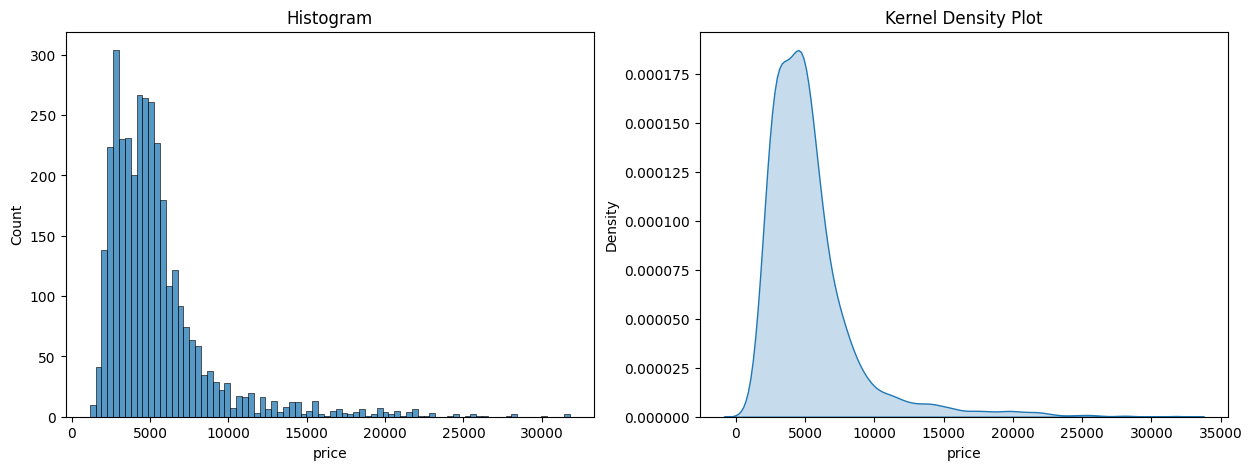

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(data=df, x='price', kde=False, ax=ax1)
ax1.set_title('Histogram')

sns.kdeplot(data=df, x='price', fill=True, ax=ax2)
ax2.set_title('Kernel Density Plot')

plt.show()

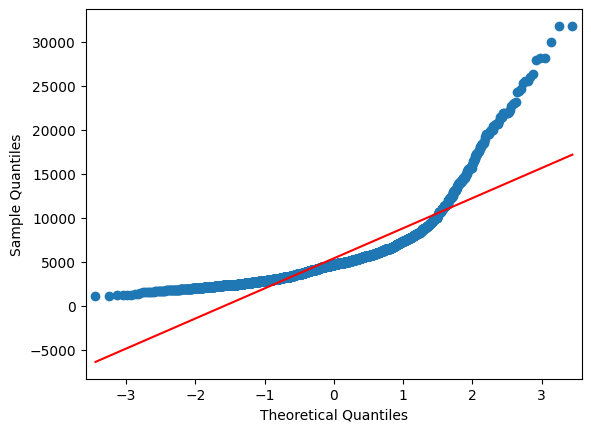

In [ ]:

qqplot(df['price'], line='s')
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['price'])
print(f'Shapiro-Wilk test: stat={round(stat, 2)}, p={round(p, 2)}')

Shapiro-Wilk test: stat=0.74, p=0.0


In [ ]:
df = pd.DataFrame(notebook_data)
top_systems = df['System operacyjny:'].value_counts()[:6].index.tolist()
df['System operacyjny:'] = np.where(df['System operacyjny:'].isin(top_systems), df['System operacyjny:'], 'other_system')

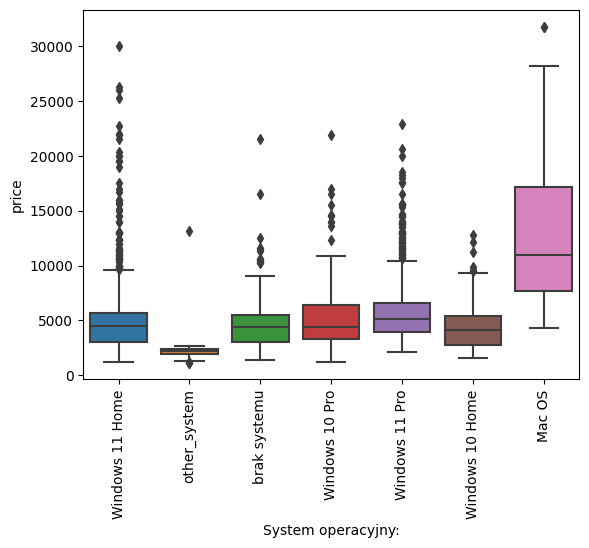

In [ ]:
sns.boxplot(x="System operacyjny:", y="price", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = pd.DataFrame(notebook_data)
df['System operacyjny:'] = df['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)

In [ ]:
df['System operacyjny:'].value_counts()

Windows         2579
brak systemu     728
Mac OS           169
Chrome OS          5
Linux              1
Name: System operacyjny:, dtype: int64

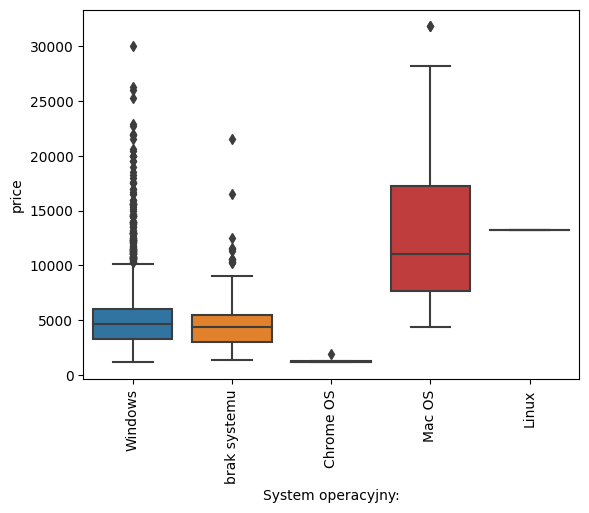

In [ ]:
sns.boxplot(x="System operacyjny:", y="price", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = pd.DataFrame(notebook_data)

df1 = df.copy()
df2 = df.copy()

top_ram = df1['Wielkość pamięci RAM:'].value_counts()[:5].index.tolist()

df1['Wielkość pamięci RAM:'] = np.where(df1['Wielkość pamięci RAM:'].isin(top_ram), df1['Wielkość pamięci RAM:'], 'other_ram')
df2['Wielkość pamięci RAM:'] = df2['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

In [ ]:
df1['Wielkość pamięci RAM:'].value_counts()

16 GB        1611
8 GB          862
32 GB         738
12 GB         144
other_ram      76
64 GB          51
Name: Wielkość pamięci RAM:, dtype: int64

In [ ]:
df2['Wielkość pamięci RAM:'].value_counts()

16    1611
8      862
32     738
12     144
64      51
4       43
24      27
96       5
40       1
Name: Wielkość pamięci RAM:, dtype: int64

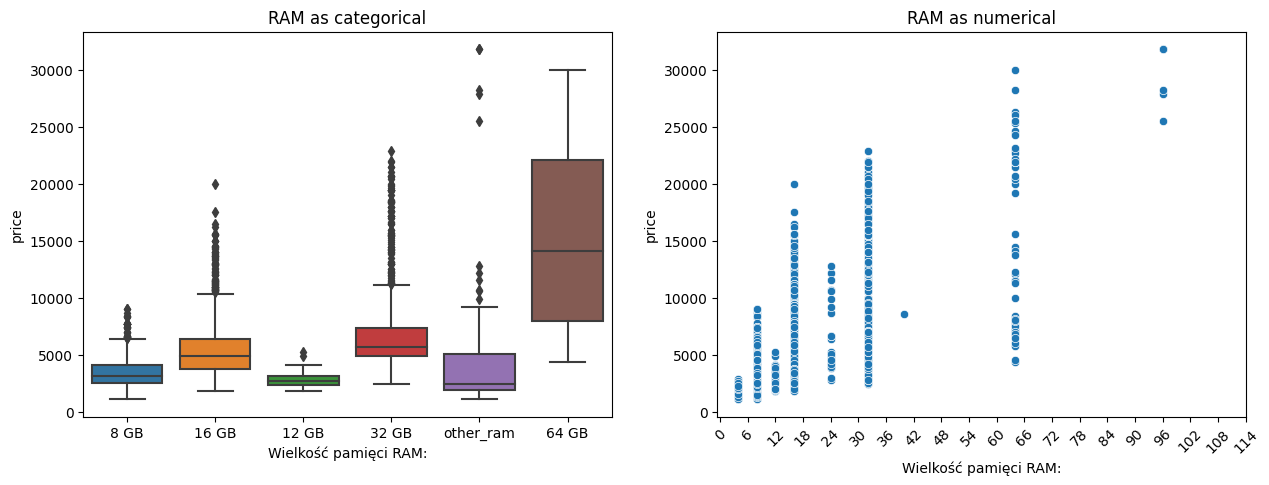

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(x="Wielkość pamięci RAM:", y="price", data=df1, ax=ax1)
plt.xticks(rotation=90)
ax1.set_title('RAM as categorical')

sns.scatterplot(x="Wielkość pamięci RAM:", y="price", data=df2)
plt.xticks(range(0, 120, 6),
           rotation=45)
ax2.set_title('RAM as numerical')

plt.show()

In [ ]:
df = pd.DataFrame(notebook_data)

df1 = df.copy()
df2 = df.copy()

top_ssd = df1['Pojemność dysku SSD:'].value_counts()[:5].index.tolist()

df1['Pojemność dysku SSD:'] = np.where(df1['Pojemność dysku SSD:'].isin(top_ssd), df1['Pojemność dysku SSD:'], 'other_hardware')

most_common_ssd = df2['Pojemność dysku SSD:'].value_counts().head().index[0]
df2['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
df2['Pojemność dysku SSD:'] = df2['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)


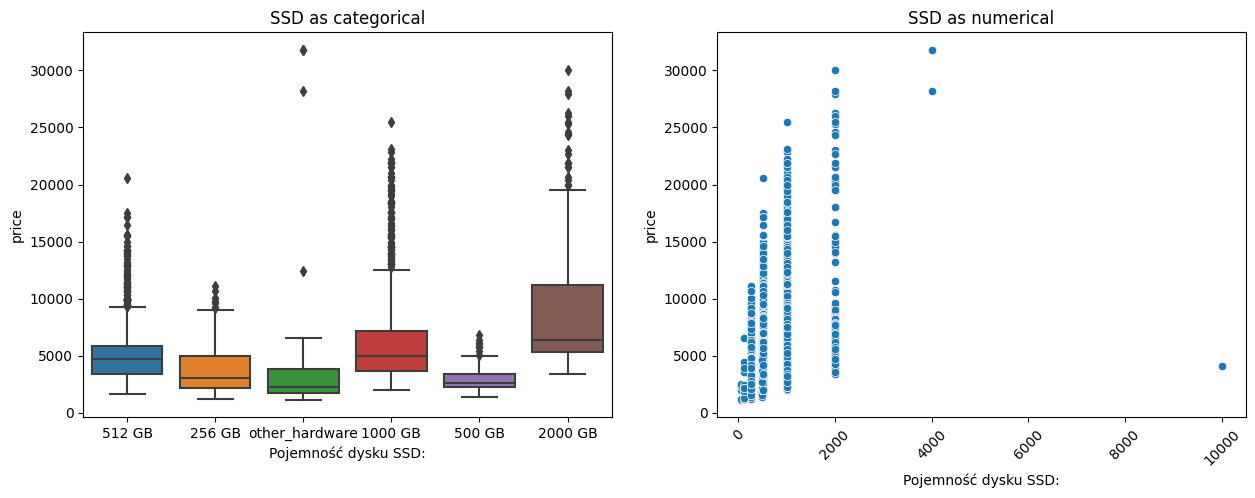

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(x="Pojemność dysku SSD:", y="price", data=df1, ax=ax1)
plt.xticks(rotation=90)
ax1.set_title('SSD as categorical')

sns.scatterplot(x="Pojemność dysku SSD:", y="price", data=df2)
plt.xticks(rotation=45)
ax2.set_title('SSD as numerical')

plt.show()

In [ ]:
df2['Pojemność dysku SSD:'].value_counts()

In [ ]:
ssd_threshold = 4000
price_threshold = np.percentile(df['price'], 75)
conditions = (df2['Pojemność dysku SSD:'] > ssd_threshold) & (df2['price'] < price_threshold)
df2.drop(index=df2[conditions].index, inplace=True)

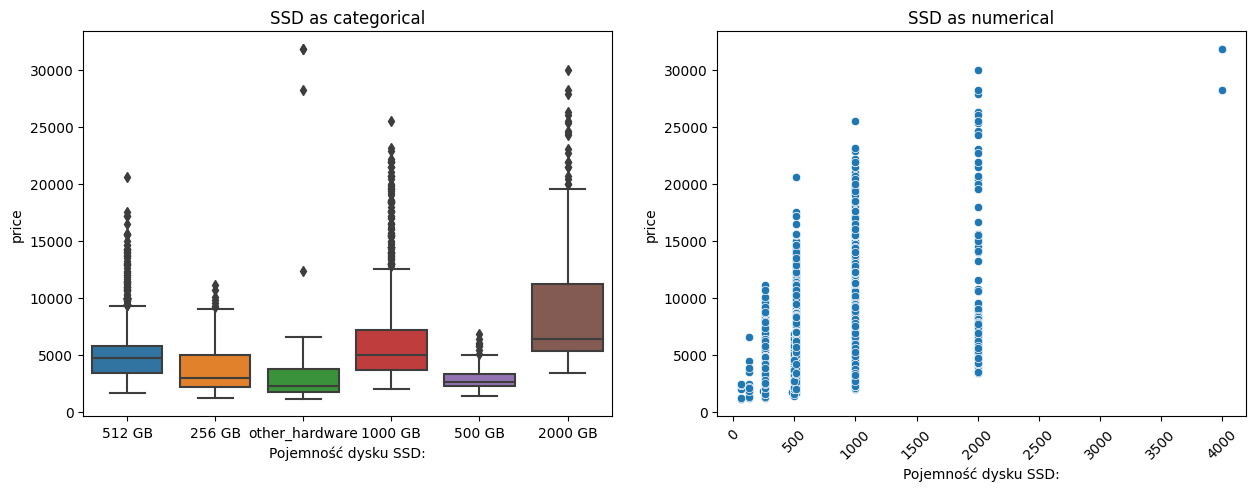

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(x="Pojemność dysku SSD:", y="price", data=df1, ax=ax1)
plt.xticks(rotation=90)
ax1.set_title('SSD as categorical')

sns.scatterplot(x="Pojemność dysku SSD:", y="price", data=df2)
plt.xticks(rotation=45)
ax2.set_title('SSD as numerical')

plt.show()

In [ ]:
df.info()

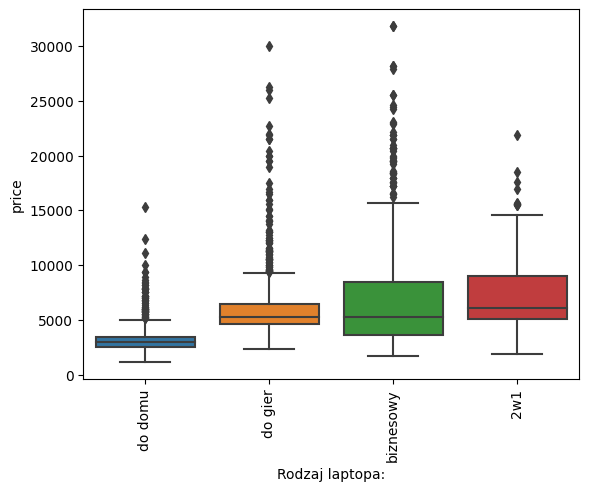

In [ ]:
df = pd.DataFrame(notebook_data)

df2 = df.copy()

sns.boxplot(x="Rodzaj laptopa:", y="price", data=df2)
plt.xticks(rotation=90)

plt.show()

#Predictive models for categorical independent variables

Given the following results, which show the accuracy of the linear regression model at 52.1% and the decision tree at 64.9%, and the fact that the model can be wrong by almost 1,300 zlotys (25% of the price) on a laptop, it was decided to treat the added resolution value and present RAM and SSD capacity as numerical data to assess their impact on the model. 

##Clear and scale

In [42]:
df = pd.DataFrame(notebook_data)

In [44]:
def separate_train_test(df, X_list: list, y_list:list):
  X = df[X_list]
  y = df[y_list]
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 
  return X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = separate_train_test(df, ['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:'], ['price'])

In [46]:
X_train['System operacyjny:'] = np.where(X_train['System operacyjny:'].isin(X_train['System operacyjny:'].value_counts()[:6].index.tolist()), X_train['System operacyjny:'], 'other_system')
X_train['Wielkość pamięci RAM:'] = np.where(X_train['Wielkość pamięci RAM:'].isin(X_train['Wielkość pamięci RAM:'].value_counts()[:5].index.tolist()), X_train['Wielkość pamięci RAM:'], 'other_ram')
X_train['Pojemność dysku SSD:'] = np.where(X_train['Pojemność dysku SSD:'].isin(X_train['Pojemność dysku SSD:'].value_counts()[:5].index.tolist()), X_train['Pojemność dysku SSD:'], 'other_hardware')

In [47]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

In [48]:
scaled_y  = scaler.fit_transform(y_train) #PAMIĘTAJ NIE DAWAJ FITA POTEM NA TESTOWYM!!!!
encoded_x = ohe.fit_transform(X_train)

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(encoded_x, scaled_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.5215566181980084

In [ ]:
linear_grid.best_params_

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(encoded_x, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV 1/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.697 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.639 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.704 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.567 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.703 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.640 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.598 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.589 total time=   0.0s
[CV 9/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.582 total time=   0.0s
[CV 10/10] END max_depth=1

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=4)

In [ ]:
tree_grid.best_score_

0.6409434730936978

In [ ]:
tree_grid.best_params_

In [ ]:
#NIE TYKAĆ 
# linear_pred = linear_grid.predict(X_test)
# tree_pred = tree_grid.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(encoded_x)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(encoded_x)))
print(mean_squared_error(y_train, tree_grid.predict(encoded_x)))

#Predictive models for categorical and numerical independent variables

The decision to transform the data into numeric values and include resolution resulted in an increase in model efficiency (R^2 = 76%), indicating that the laptop price prediction could be off by approximately 1078 Polish złoty (about 22.6%). However, these values still require further improvement of the model. It has been decided to obtain data on graphics card performance, as this characteristic has the highest impact on the price of the unit according to our preliminary analysis. Due to the large number of categories, it is necessary to assign some numerical values to them, as using one-hot encoding would result in too many columns. However, reducing the categories, for example, to 10 where 9 of them will be the most frequent values and the 10th category will be 'others', would oversimplify and omit important graphics card models.

##Clear and scale

In [ ]:
df = pd.DataFrame(notebook_data)

In [ ]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude='object')) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include='object'))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.6596484231294372

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

In [ ]:
tree_grid.best_score_

0.7634120100314741

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))
print(mean_squared_error(y_train, tree_grid.predict(processed_data)))

1078.3784914501357
0.22620792331586395
2416460.15967594


#Predictive models for categorical and numerical independent variables with GPU benchmark scores

Based on the analysis of the initial correlation of dependencies, it was decided to enrich the model with benchmark scores for graphics cards representing specific laptop models. This data allowed to improve the performance of the model to R^2= 90.0% for the decision tree model, while the linear model reached 68.1%. Thus, a level was reached where the model was wrong on average by 12% on the price of one unit (about PLN 580). Although this is a satisfactory level, the available data also allow to try to improve the performance of the model by adding such independent variables as the presence of a second and third SSD and whether the device has a backlit keyboard.


##Clear and scale

In [ ]:
df = pd.DataFrame(notebook_data)

In [ ]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:', 'Karta graficzna:']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

top_cat = X_train['Karta graficzna:'].value_counts()[0]
X_train['Karta graficzna:'] = X_train['Karta graficzna:'].fillna(top_cat)

In [ ]:
X_train['GPU benchmark:'] = X_train['Karta graficzna:'].map(get_gpu_scores(X_train['Karta graficzna:']))

{'NVIDIA GeForce RTX 4090': 326265, 'NVIDIA RTX 6000 Ada Generation': 312956, 'NVIDIA GeForce RTX 4080': 245911, 'NVIDIA A100 80GB PCIe': 214586, 'GeForce RTX 3080 Ti': 209081, 'NVIDIA GeForce RTX 4070 Ti': 208687, 'NVIDIA A100-PCIE-80GB': 207124, 'NVIDIA GeForce RTX 3090 Ti': 205960, 'RTX A6000': 200330, 'AMD Radeon RX 7900 XTX': 198371, 'GRID A100-7-40C MIG 7g.40gb': 196825, 'NVIDIA GeForce RTX 3090': 196325, 'NVIDIA GeForce RTX 3080 Ti': 193499, 'GeForce RTX 3090': 193334, 'NVIDIA RTX A6000': 193084, 'NVIDIA A40': 190886, 'NVIDIA GeForce RTX 4090 Laptop GPU': 181670, 'GeForce RTX 3080': 178807, 'AMD Radeon RX 7900 XT': 178476, 'NVIDIA A40-12Q': 174796, 'NVIDIA GeForce RTX 3080': 174324, 'AMD Radeon RX 6950 XT': 173715, 'NVIDIA A10G': 172506, 'NVIDIA GeForce RTX 4070': 172329, 'Quadro GV100': 168515, 'RTX A5000': 166307, 'NVIDIA A10': 164387, 'NVIDIA GeForce RTX 4080 Laptop GPU': 161374, 'NVIDIA RTX A5000': 160869, 'AMD Radeon RX 6900 XT': 160266, 'RX 6800 XT': 158867, 'A40-12Q': 156

In [ ]:
X_train.drop('Karta graficzna:', axis=1, inplace=True)

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude='object')) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include='object'))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.6817256144091597

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV 1/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.822 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.876 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.801 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.864 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.853 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.810 total time=   0.0s
[CV 9/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.821 total time=   0.0s
[CV 10/10] END max_depth=1

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=4)

In [ ]:
tree_grid.best_score_

0.8506660469058849

In [ ]:
tree_grid.best_params_

{'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))
print(mean_squared_error(y_train, tree_grid.predict(processed_data)))

583.9428825733746
0.12181727019573348
901469.7037842729


#Predictive models for categorical and numerical independent variables with GPU benchmark scores, presence of additional SSDs and whether the keyboard is backlit.

Preliminary analysis showed that the Information on whether the laptop has a backlit keyboard and/or a second ssd drive will affect the price. Accordingly, an attempt was made to fine-tune the model with these two additional pieces of information. The results showed a slight improvement, with the decision tree reaching an error rate of 10.7% (PLN 490 per unit).

##Clear and scale

In [ ]:
df = pd.DataFrame(notebook_data)

In [ ]:
df.sample(5)

In [ ]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:', 'Karta graficzna:', 'Pojemność dysku SSD 2:', 'Podświetlana klawiatura:']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train.info()

In [ ]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

top_cat = X_train['Karta graficzna:'].value_counts()[0]
X_train['Karta graficzna:'] = X_train['Karta graficzna:'].fillna(top_cat)

X_train['Pojemność dysku SSD 2:'] = np.where(X_train['Pojemność dysku SSD 2:'].isnull(), False, True)
X_train['Podświetlana klawiatura:'] = np.where(X_train['Podświetlana klawiatura:'] == 'tak', True, False)

In [ ]:
X_train.info()

In [ ]:
X_train['GPU benchmark:'] = X_train['Karta graficzna:'].map(get_gpu_scores(X_train['Karta graficzna:']))

In [ ]:
X_train.drop('Karta graficzna:', axis=1, inplace=True)

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude=['object', 'bool'])) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include=['object', 'bool']))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
pd.DataFrame(x_encoded, columns=ohe.get_feature_names_out())


In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.7445610000415883

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

In [ ]:
tree_grid.best_score_

0.8983570115918169

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))

490.8283794180611
0.10676592039677966


In [ ]:
tree_grid.best_estimator_.feature_importances_ #wagi wszystkich cech, które były istotne

array([0.10368939, 0.02417551, 0.60119965, 0.24749881, 0.        ,
       0.00427457, 0.00395495, 0.00421379, 0.00365856, 0.00733478])

In [ ]:
scaler_x.get_feature_names_out()

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:'], dtype=object)

In [ ]:
ohe.get_feature_names_out()

array(['System operacyjny:_Linux', 'System operacyjny:_Mac OS',
       'System operacyjny:_Windows', 'System operacyjny:_brak systemu',
       'Pojemność dysku SSD 2:_True', 'Podświetlana klawiatura:_True'],
      dtype=object)

In [ ]:
np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'System operacyjny:_Linux',
       'System operacyjny:_Mac OS', 'System operacyjny:_Windows',
       'System operacyjny:_brak systemu', 'Pojemność dysku SSD 2:_True',
       'Podświetlana klawiatura:_True'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Wielkość pamięci RAM:'),
  Text(1, 0, 'Pojemność dysku SSD:'),
  Text(2, 0, 'Rozdzielczość:'),
  Text(3, 0, 'GPU benchmark:'),
  Text(4, 0, 'System operacyjny:_Linux'),
  Text(5, 0, 'System operacyjny:_Mac OS'),
  Text(6, 0, 'System operacyjny:_Windows'),
  Text(7, 0, 'System operacyjny:_brak systemu'),
  Text(8, 0, 'Pojemność dysku SSD 2:_True'),
  Text(9, 0, 'Podświetlana klawiatura:_True')])

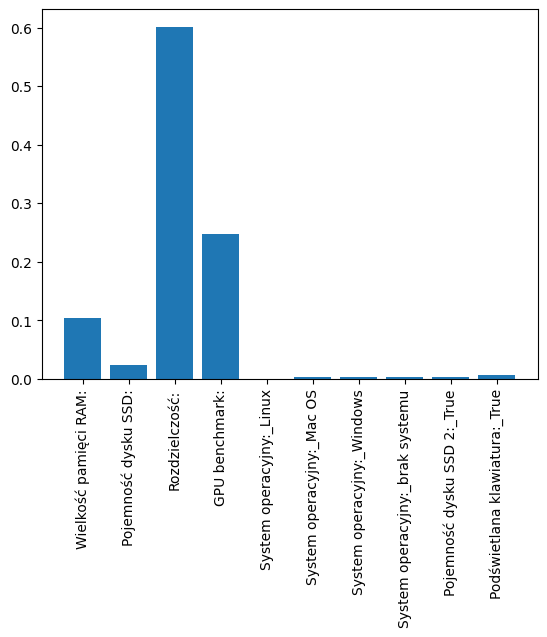

In [ ]:
x_bar = np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])
y_bar = tree_grid.best_estimator_.feature_importances_
plt.bar(x_bar, 
        y_bar)

plt.xticks(rotation=90)

#Predictive models for categorical and numerical independent variables with a laptop type feature.

As shown in the data analysis, there is a correlation between the price and the type of laptop. Due to the fact that "home" laptops have an average price lower than the others, this gives a significant information to the model to improve its performance. 

##Clear and scale

In [24]:
df = pd.DataFrame(notebook_data)

In [ ]:
df.sample(5)

In [25]:
df['Rodzaj laptopa:'].isnull().sum()

3

In [26]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:', 'Karta graficzna:', 'Pojemność dysku SSD 2:', 'Podświetlana klawiatura:', 'Rodzaj laptopa:']]
y = df[['price']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train.info()

In [28]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

top_cat = X_train['Karta graficzna:'].value_counts()[0]
X_train['Karta graficzna:'] = X_train['Karta graficzna:'].fillna(top_cat)

X_train['Pojemność dysku SSD 2:'] = np.where(X_train['Pojemność dysku SSD 2:'].isnull(), False, True)
X_train['Podświetlana klawiatura:'] = np.where(X_train['Podświetlana klawiatura:'] == 'tak', True, False)

most_common_type = X_train['Rodzaj laptopa:'].value_counts().head().index[0]
X_train['Rodzaj laptopa:'].fillna(most_common_type, inplace=True)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 1134 to 3174
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   System operacyjny:        2784 non-null   object
 1   Wielkość pamięci RAM:     2784 non-null   int64 
 2   Pojemność dysku SSD:      2784 non-null   int64 
 3   Rozdzielczość:            2784 non-null   int64 
 4   Karta graficzna:          2784 non-null   object
 5   Pojemność dysku SSD 2:    2784 non-null   bool  
 6   Podświetlana klawiatura:  2784 non-null   bool  
 7   Rodzaj laptopa:           2784 non-null   object
dtypes: bool(2), int64(3), object(3)
memory usage: 157.7+ KB


In [30]:
X_train['GPU benchmark:'] = X_train['Karta graficzna:'].map(get_gpu_scores(X_train['Karta graficzna:']))

{'NVIDIA GeForce RTX 4090': 326299, 'NVIDIA RTX 6000 Ada Generation': 312956, 'NVIDIA GeForce RTX 4080': 245994, 'NVIDIA A100 80GB PCIe': 214586, 'GeForce RTX 3080 Ti': 209081, 'NVIDIA GeForce RTX 4070 Ti': 208483, 'NVIDIA A100-PCIE-80GB': 207124, 'NVIDIA GeForce RTX 3090 Ti': 206347, 'RTX A6000': 200330, 'AMD Radeon RX 7900 XTX': 198441, 'GRID A100-7-40C MIG 7g.40gb': 196825, 'NVIDIA GeForce RTX 3090': 196037, 'NVIDIA RTX A6000': 193900, 'NVIDIA GeForce RTX 3080 Ti': 193341, 'NVIDIA A40': 192412, 'GeForce RTX 3090': 192100, 'NVIDIA GeForce RTX 4090 Laptop GPU': 181743, 'GeForce RTX 3080': 178807, 'AMD Radeon RX 7900 XT': 178396, 'NVIDIA A40-12Q': 174796, 'NVIDIA GeForce RTX 3080': 174363, 'AMD Radeon RX 6950 XT': 173768, 'NVIDIA A10G': 172506, 'NVIDIA GeForce RTX 4070': 171511, 'Quadro GV100': 168515, 'RTX A5000': 166307, 'NVIDIA A10': 164239, 'NVIDIA GeForce RTX 4080 Laptop GPU': 161702, 'NVIDIA RTX A5000': 160869, 'AMD Radeon RX 6900 XT': 160345, 'RX 6800 XT': 158867, 'A40-12Q': 156

In [31]:
X_train.drop('Karta graficzna:', axis=1, inplace=True)

In [32]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [33]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude=['object', 'bool'])) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include=['object', 'bool']))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
pd.DataFrame(x_encoded, columns=ohe.get_feature_names_out())


In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

In [35]:
concated = pd.concat([X_train, y_train], axis=1)

In [ ]:
concated

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.7207753195286444

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

In [ ]:
tree_grid.best_score_

0.9170619471499846

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))

428.0319823706748
0.09131652893271472


In [ ]:
tree_grid.best_estimator_.feature_importances_ #wagi wszystkich cech, które były istotne

array([8.87089661e-02, 2.39558910e-02, 5.85356731e-01, 1.67534618e-01,
       4.43282180e-04, 3.10762643e-03, 1.37554713e-03, 2.21199170e-03,
       4.37289898e-03, 7.37365086e-03, 7.24348400e-03, 9.42444483e-02,
       1.40708637e-02])

In [ ]:
scaler_x.get_feature_names_out()

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:'], dtype=object)

In [ ]:
ohe.get_feature_names_out()

array(['System operacyjny:_Linux', 'System operacyjny:_Mac OS',
       'System operacyjny:_Windows', 'System operacyjny:_brak systemu',
       'Pojemność dysku SSD 2:_True', 'Podświetlana klawiatura:_True',
       'Rodzaj laptopa:_biznesowy', 'Rodzaj laptopa:_do domu',
       'Rodzaj laptopa:_do gier'], dtype=object)

In [ ]:
np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'System operacyjny:_Linux',
       'System operacyjny:_Mac OS', 'System operacyjny:_Windows',
       'System operacyjny:_brak systemu', 'Pojemność dysku SSD 2:_True',
       'Podświetlana klawiatura:_True', 'Rodzaj laptopa:_biznesowy',
       'Rodzaj laptopa:_do domu', 'Rodzaj laptopa:_do gier'], dtype=object)

In [ ]:
x_bar = np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])
y_bar = tree_grid.best_estimator_.feature_importances_
plt.bar(x_bar, 
        y_bar)

plt.xticks(rotation=90)

#SANDBOX

In [ ]:
url = 'https://browser.geekbench.com/processor-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

cpu_scores = {}
cpus = []
scores = []
single_core = soup.find('div', {'id': 'single-core'})
# print(single_score)

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('a'):
  cpus.append(item.text.strip())
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

url = 'https://browser.geekbench.com/mac-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

single_core = soup.find('div', {'id': 'single-core'})

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('div', {'class': 'description'}):
  name = item.text.strip().split('@')[0].strip()
  cores = item.text.strip().split('GHz')[1].strip()
  full_name = name + ' ' + cores
  cpus.append(full_name)
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

for i in range(0, len(cpus)):
    cpu_scores[cpus[i]] = scores[i]

print(cpu_scores)

# list_of_cpus = X_train['Karta graficzna:'].unique().tolist()
# print(type(list_of_cpus[0]), list_of_cpus[0])

# # find the best matching GPU name in the dictionary for each GPU name in the list
# matches = {}
# matched_gpus = {}
# for gpu_name in list_of_gpus:
#     best_match = None
#     best_score = 0
#     for name in gpu_scores.keys():
#         score = fuzz.ratio(name, str(gpu_name))
#         if score > best_score:
#             best_match = gpu_name
#             best_score = score
#             best_value = gpu_scores[name]
#     matches[gpu_name] = best_match
#     matched_gpus[best_match] = best_value



{'Intel Core i9-13900KS': 3072, 'Intel Core i9-13900KF': 2949, 'Intel Core i9-13900K': 2940, 'AMD Ryzen 9 7950X': 2874, 'AMD Ryzen 9 7950X3D': 2873, 'AMD Ryzen 7 7700X': 2860, 'AMD Ryzen 9 7900X': 2848, 'Intel Core i7-13700KF': 2826, 'Intel Core i7-13700K': 2797, 'AMD Ryzen 5 7600X': 2795, 'AMD Ryzen 9 7900': 2795, 'AMD Ryzen 9 7900X3D': 2785, 'AMD Ryzen 7 7700': 2770, 'AMD Ryzen 9 7945HX': 2692, 'Intel Core i9-12900KS': 2660, 'AMD Ryzen 5 7600': 2653, 'Intel Core i5-13600K': 2646, 'Intel Core i9-13900': 2642, 'AMD Ryzen 9 7845HX': 2633, 'Intel Core i5-13600KF': 2613, 'Intel Core i7-13700': 2566, 'Intel Core i9-12900K': 2550, 'Intel Core i9-12900KF': 2498, 'Intel Core i7-12700K': 2490, 'Intel Core i5-12600KF': 2455, 'Intel Core i7-12700KF': 2424, 'Intel Core i9-12900': 2395, 'Intel Core i5-13500': 2366, 'Intel Core i5-12600K': 2358, 'Intel Core i7-12700F': 2343, 'Intel Core i5-12600': 2341, 'Intel Core i9-11900K': 2284, 'Intel Core i9-11900KF': 2260, 'Intel Core i5-13600': 2256, 'Intel

In [ ]:
for i in range(0, len(cpus)):
    cpu_scores[cpus[i].strip().split('\n')[0]] = scores[i]

##Clear and scale

In [ ]:
df = pd.DataFrame(notebook_data)

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df['Rodzaj laptopa:'].isnull().sum()

5

In [ ]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:', 'Karta graficzna:', 'Pojemność dysku SSD 2:', 'Podświetlana klawiatura:', 'Rodzaj laptopa:', 'CPU:']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train.info()

In [ ]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

top_cat = X_train['Karta graficzna:'].value_counts()[0]
X_train['Karta graficzna:'] = X_train['Karta graficzna:'].fillna(top_cat)

X_train['Pojemność dysku SSD 2:'] = np.where(X_train['Pojemność dysku SSD 2:'].isnull(), False, True)
X_train['Podświetlana klawiatura:'] = np.where(X_train['Podświetlana klawiatura:'] == 'tak', True, False)

most_common_type = X_train['Rodzaj laptopa:'].value_counts().head().index[0]
X_train['Rodzaj laptopa:'].fillna(most_common_type, inplace=True)

In [ ]:
X_train.info()

In [ ]:
X_train['GPU benchmark:'] = X_train['Karta graficzna:'].map(get_gpu_scores(X_train['Karta graficzna:']))

{'NVIDIA GeForce RTX 4090': 326257, 'NVIDIA RTX 6000 Ada Generation': 312956, 'NVIDIA GeForce RTX 4080': 245919, 'NVIDIA A100 80GB PCIe': 214586, 'GeForce RTX 3080 Ti': 209081, 'NVIDIA GeForce RTX 4070 Ti': 208579, 'NVIDIA A100-PCIE-80GB': 207124, 'NVIDIA GeForce RTX 3090 Ti': 206024, 'RTX A6000': 200330, 'AMD Radeon RX 7900 XTX': 198562, 'GRID A100-7-40C MIG 7g.40gb': 196825, 'NVIDIA GeForce RTX 3090': 196290, 'NVIDIA RTX A6000': 193750, 'NVIDIA GeForce RTX 3080 Ti': 193488, 'GeForce RTX 3090': 193334, 'NVIDIA A40': 192375, 'NVIDIA GeForce RTX 4090 Laptop GPU': 181293, 'GeForce RTX 3080': 178807, 'AMD Radeon RX 7900 XT': 178503, 'NVIDIA A40-12Q': 174796, 'NVIDIA GeForce RTX 3080': 174340, 'AMD Radeon RX 6950 XT': 173726, 'NVIDIA GeForce RTX 4070': 172844, 'NVIDIA A10G': 172506, 'Quadro GV100': 168515, 'RTX A5000': 166307, 'NVIDIA A10': 164387, 'NVIDIA GeForce RTX 4080 Laptop GPU': 161406, 'NVIDIA RTX A5000': 160869, 'AMD Radeon RX 6900 XT': 160398, 'RX 6800 XT': 158867, 'A40-12Q': 156

In [ ]:
url = 'https://browser.geekbench.com/processor-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

cpu_scores = {}
cpus = []
scores = []
single_core = soup.find('div', {'id': 'single-core'})
# print(single_score)

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('a'):
  cpus.append(item.text.strip())
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

url = 'https://browser.geekbench.com/mac-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

single_core = soup.find('div', {'id': 'single-core'})

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('div', {'class': 'description'}):
  name = item.text.strip().split('@')[0].strip()
  cores = item.text.strip().split('GHz')[1].strip()
  full_name = name + ' ' + cores
  cpus.append(full_name)
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

for i in range(0, len(cpus)):
    cpu_scores[cpus[i]] = scores[i]

print(cpu_scores)

list_of_cpus = X_train['CPU:'].unique().tolist()
print(type(list_of_cpus[0]), list_of_cpus[0])

# find the best matching GPU name in the dictionary for each GPU name in the list
matches = {}
matched_cpus = {}
for cpu_name in list_of_cpus:
    best_match = None
    best_score = 0
    for name in cpu_scores.keys():
        score = fuzz.ratio(name, str(cpu_name))
        if score > best_score:
            best_match = cpu_name
            best_score = score
            best_value = cpu_scores[name]
    matches[cpu_name] = best_match
    matched_cpus[best_match] = best_value

print(matched_cpus)

{'Intel Core i9-13900KS': 3072, 'Intel Core i9-13900KF': 2949, 'Intel Core i9-13900K': 2940, 'AMD Ryzen 9 7950X': 2874, 'AMD Ryzen 9 7950X3D': 2873, 'AMD Ryzen 7 7700X': 2860, 'AMD Ryzen 9 7900X': 2848, 'Intel Core i7-13700KF': 2826, 'Intel Core i7-13700K': 2797, 'AMD Ryzen 5 7600X': 2795, 'AMD Ryzen 9 7900': 2795, 'AMD Ryzen 9 7900X3D': 2785, 'AMD Ryzen 7 7700': 2770, 'AMD Ryzen 9 7945HX': 2692, 'Intel Core i9-12900KS': 2660, 'AMD Ryzen 5 7600': 2653, 'Intel Core i5-13600K': 2646, 'Intel Core i9-13900': 2642, 'AMD Ryzen 9 7845HX': 2633, 'Intel Core i5-13600KF': 2613, 'Intel Core i7-13700': 2566, 'Intel Core i9-12900K': 2550, 'Intel Core i9-12900KF': 2498, 'Intel Core i7-12700K': 2490, 'Intel Core i5-12600KF': 2455, 'Intel Core i7-12700KF': 2424, 'Intel Core i9-12900': 2395, 'Intel Core i5-13500': 2366, 'Intel Core i5-12600K': 2358, 'Intel Core i7-12700F': 2343, 'Intel Core i5-12600': 2341, 'Intel Core i9-11900K': 2284, 'Intel Core i9-11900KF': 2260, 'Intel Core i5-13600': 2256, 'Intel

In [ ]:
X_train['CPU benchmark:'] = X_train['CPU:'].map(matched_cpus)

In [ ]:
X_train['Pojemność dysku SSD:']

1134     256
568     1000
1706     512
2619     256
2098     512
        ... 
1095     512
1130     512
1294    1000
860      512
3174     512
Name: Pojemność dysku SSD:, Length: 2784, dtype: int64

In [ ]:
grouped_data = X_train.groupby(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:'])

In [ ]:
mean_data = grouped_data.mean()

<ipython-input-130-4a3a00b321c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = grouped_data.mean()


In [ ]:
mean_CPU = float(mean_data.loc[(X_train[X_train['CPU benchmark:'].isnull()]['Wielkość pamięci RAM:'], X_train[X_train['CPU benchmark:'].isnull()]['Pojemność dysku SSD:']), 'CPU benchmark:'].values[0])

In [ ]:
X_train['CPU benchmark:'] = np.where(X_train['CPU benchmark:'].isnull(),
                                     float(mean_data.loc[(X_train[X_train['CPU benchmark:'].isnull()]['Wielkość pamięci RAM:'], X_train[X_train['CPU benchmark:'].isnull()]['Pojemność dysku SSD:']), 'CPU benchmark:'].values[0]),
                                     X_train['CPU benchmark:'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 1134 to 3174
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   System operacyjny:        2784 non-null   object 
 1   Wielkość pamięci RAM:     2784 non-null   int64  
 2   Pojemność dysku SSD:      2784 non-null   int64  
 3   Rozdzielczość:            2784 non-null   int64  
 4   Pojemność dysku SSD 2:    2784 non-null   bool   
 5   Podświetlana klawiatura:  2784 non-null   bool   
 6   Rodzaj laptopa:           2784 non-null   object 
 7   GPU benchmark:            2784 non-null   int64  
 8   CPU benchmark:            2784 non-null   float64
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 179.4+ KB


In [ ]:
X_train.drop('Karta graficzna:', axis=1, inplace=True)
X_train.drop('CPU:', axis=1, inplace=True)

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude=['object', 'bool'])) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include=['object', 'bool']))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
pd.DataFrame(x_encoded, columns=ohe.get_feature_names_out())


In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.7340881616731508

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV 1/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.892 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.891 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.877 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.876 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.797 total time=   0.0s
[CV 9/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.915 total time=   0.0s
[CV 10/10] END max_depth=1

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=4)

In [ ]:
tree_grid.best_score_

0.8916345734466777

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))

382.67975628628835
0.07314989243716583


In [ ]:
tree_grid.best_estimator_.feature_importances_ #wagi wszystkich cech, które były istotne

array([0.03362048, 0.02016107, 0.56971128, 0.21530005, 0.12043955,
       0.        , 0.        , 0.00197145, 0.00153829, 0.00505031,
       0.00543303, 0.00336805, 0.01923428, 0.00417216])

In [ ]:
scaler_x.get_feature_names_out()

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'CPU benchmark:'], dtype=object)

In [ ]:
ohe.get_feature_names_out()

array(['System operacyjny:_Linux', 'System operacyjny:_Mac OS',
       'System operacyjny:_Windows', 'System operacyjny:_brak systemu',
       'Pojemność dysku SSD 2:_True', 'Podświetlana klawiatura:_True',
       'Rodzaj laptopa:_biznesowy', 'Rodzaj laptopa:_do domu',
       'Rodzaj laptopa:_do gier'], dtype=object)

In [ ]:
np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'CPU benchmark:', 'System operacyjny:_Linux',
       'System operacyjny:_Mac OS', 'System operacyjny:_Windows',
       'System operacyjny:_brak systemu', 'Pojemność dysku SSD 2:_True',
       'Podświetlana klawiatura:_True', 'Rodzaj laptopa:_biznesowy',
       'Rodzaj laptopa:_do domu', 'Rodzaj laptopa:_do gier'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Wielkość pamięci RAM:'),
  Text(1, 0, 'Pojemność dysku SSD:'),
  Text(2, 0, 'Rozdzielczość:'),
  Text(3, 0, 'GPU benchmark:'),
  Text(4, 0, 'CPU benchmark:'),
  Text(5, 0, 'System operacyjny:_Linux'),
  Text(6, 0, 'System operacyjny:_Mac OS'),
  Text(7, 0, 'System operacyjny:_Windows'),
  Text(8, 0, 'System operacyjny:_brak systemu'),
  Text(9, 0, 'Pojemność dysku SSD 2:_True'),
  Text(10, 0, 'Podświetlana klawiatura:_True'),
  Text(11, 0, 'Rodzaj laptopa:_biznesowy'),
  Text(12, 0, 'Rodzaj laptopa:_do domu'),
  Text(13, 0, 'Rodzaj laptopa:_do gier')])

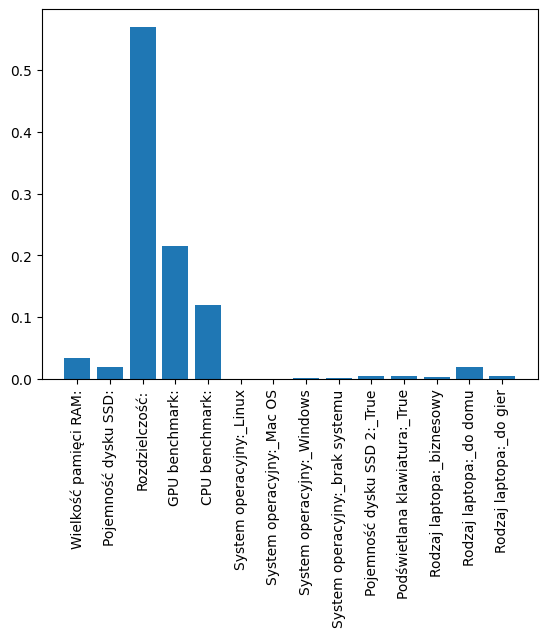

In [ ]:
x_bar = np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])
y_bar = tree_grid.best_estimator_.feature_importances_
plt.bar(x_bar, 
        y_bar)

plt.xticks(rotation=90)

##Add laptop brand

##Clear and scale

In [ ]:
df = pd.DataFrame(notebook_data)

In [ ]:
df.sample(5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     3482 non-null   float64
 1   price_no_sale             3482 non-null   float64
 2   System operacyjny:        3482 non-null   object 
 3   Rodzaj laptopa:           3479 non-null   object 
 4   Rozdzielczość:            3465 non-null   object 
 5   Typ procesora:            3481 non-null   object 
 6   Wielkość pamięci RAM:     3482 non-null   object 
 7   Pojemność dysku SSD:      3481 non-null   object 
 8   Karta graficzna:          3424 non-null   object 
 9   Waga:                     833 non-null    object 
 10  CPU:                      3482 non-null   object 
 11  Marka:                    3482 non-null   object 
 12  Podświetlana klawiatura:  1904 non-null   object 
 13  Wbudowany modem:          42 non-null     object 
 14  Przekątn

In [ ]:
df['Rodzaj laptopa:'].isnull().sum()

5

In [ ]:
X = df[['System operacyjny:', 'Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:', 'Karta graficzna:', 'Pojemność dysku SSD 2:', 'Podświetlana klawiatura:', 'Rodzaj laptopa:', 'CPU:', 'Marka:']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # zwraca tupla z czterema elementami 

In [ ]:
X_train.info()

In [ ]:
X_train['Marka:'] = np.where(X_train['Marka:'].isin(X_train['Marka:'].value_counts()[:10].index.tolist()), X_train['Marka:'], 'other_brand')

In [ ]:
X_train['System operacyjny:'] = X_train['System operacyjny:'].map(lambda x: 'Windows' if x.lower().startswith('windows') else x)
X_train['Wielkość pamięci RAM:'] = X_train['Wielkość pamięci RAM:'].str.split(' ').map(lambda x: x[0]).astype(int)

most_common_ssd = X_train['Pojemność dysku SSD:'].value_counts().head().index[0]
X_train['Pojemność dysku SSD:'].fillna(most_common_ssd, inplace=True)
X_train['Pojemność dysku SSD:'] = X_train['Pojemność dysku SSD:'].apply(lambda x: x.split(' ')[0]).astype(int)
ssd_threshold = 4000
price_threshold = np.percentile(y_train, 75)
merged_train = pd.concat([X_train, y_train], axis=1)
filtered_df = merged_train[(merged_train['Pojemność dysku SSD:'] > ssd_threshold) & (merged_train['price'] < price_threshold)].index
X_train.drop(index=filtered_df, axis=0, inplace=True)
y_train.drop(index=filtered_df, axis=0, inplace=True)

most_common = X_train['Rozdzielczość:'].value_counts().index[0]
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].fillna(most_common)
X_train['Rozdzielczość:'] = X_train['Rozdzielczość:'].map(lambda x: int(str(x).split('x')[0]) * int(str(x).split('x')[1].strip()[:4]))

top_cat = X_train['Karta graficzna:'].value_counts()[0]
X_train['Karta graficzna:'] = X_train['Karta graficzna:'].fillna(top_cat)

X_train['Pojemność dysku SSD 2:'] = np.where(X_train['Pojemność dysku SSD 2:'].isnull(), False, True)
X_train['Podświetlana klawiatura:'] = np.where(X_train['Podświetlana klawiatura:'] == 'tak', True, False)

most_common_type = X_train['Rodzaj laptopa:'].value_counts().head().index[0]
X_train['Rodzaj laptopa:'].fillna(most_common_type, inplace=True)

In [ ]:
X_train.info()

In [ ]:
X_train['GPU benchmark:'] = X_train['Karta graficzna:'].map(get_gpu_scores(X_train['Karta graficzna:']))

{'NVIDIA GeForce RTX 4090': 326257, 'NVIDIA RTX 6000 Ada Generation': 312956, 'NVIDIA GeForce RTX 4080': 245919, 'NVIDIA A100 80GB PCIe': 214586, 'GeForce RTX 3080 Ti': 209081, 'NVIDIA GeForce RTX 4070 Ti': 208579, 'NVIDIA A100-PCIE-80GB': 207124, 'NVIDIA GeForce RTX 3090 Ti': 206024, 'RTX A6000': 200330, 'AMD Radeon RX 7900 XTX': 198562, 'GRID A100-7-40C MIG 7g.40gb': 196825, 'NVIDIA GeForce RTX 3090': 196290, 'NVIDIA RTX A6000': 193750, 'NVIDIA GeForce RTX 3080 Ti': 193488, 'GeForce RTX 3090': 193334, 'NVIDIA A40': 192375, 'NVIDIA GeForce RTX 4090 Laptop GPU': 181293, 'GeForce RTX 3080': 178807, 'AMD Radeon RX 7900 XT': 178503, 'NVIDIA A40-12Q': 174796, 'NVIDIA GeForce RTX 3080': 174340, 'AMD Radeon RX 6950 XT': 173726, 'NVIDIA GeForce RTX 4070': 172844, 'NVIDIA A10G': 172506, 'Quadro GV100': 168515, 'RTX A5000': 166307, 'NVIDIA A10': 164387, 'NVIDIA GeForce RTX 4080 Laptop GPU': 161406, 'NVIDIA RTX A5000': 160869, 'AMD Radeon RX 6900 XT': 160398, 'RX 6800 XT': 158867, 'A40-12Q': 156

In [ ]:
url = 'https://browser.geekbench.com/processor-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

cpu_scores = {}
cpus = []
scores = []
single_core = soup.find('div', {'id': 'single-core'})
# print(single_score)

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('a'):
  cpus.append(item.text.strip())
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'pc'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

url = 'https://browser.geekbench.com/mac-benchmarks'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser')

single_core = soup.find('div', {'id': 'single-core'})

for item in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('div', {'class': 'description'}):
  name = item.text.strip().split('@')[0].strip()
  cores = item.text.strip().split('GHz')[1].strip()
  full_name = name + ' ' + cores
  cpus.append(full_name)
for score in single_core.find('table', {'class': 'table benchmark-chart-table', 'id': 'mac'}).find_all('td', {'class': 'score'}):
  scores.append(int(score.text))

for i in range(0, len(cpus)):
    cpu_scores[cpus[i]] = scores[i]

print(cpu_scores)

list_of_cpus = X_train['CPU:'].unique().tolist()
print(type(list_of_cpus[0]), list_of_cpus[0])

# find the best matching GPU name in the dictionary for each GPU name in the list
matches = {}
matched_cpus = {}
for cpu_name in list_of_cpus:
    best_match = None
    best_score = 0
    for name in cpu_scores.keys():
        score = fuzz.ratio(name, str(cpu_name))
        if score > best_score:
            best_match = cpu_name
            best_score = score
            best_value = cpu_scores[name]
    matches[cpu_name] = best_match
    matched_cpus[best_match] = best_value

print(matched_cpus)

{'Intel Core i9-13900KS': 3072, 'Intel Core i9-13900KF': 2949, 'Intel Core i9-13900K': 2940, 'AMD Ryzen 9 7950X': 2874, 'AMD Ryzen 9 7950X3D': 2873, 'AMD Ryzen 7 7700X': 2860, 'AMD Ryzen 9 7900X': 2848, 'Intel Core i7-13700KF': 2826, 'Intel Core i7-13700K': 2797, 'AMD Ryzen 5 7600X': 2795, 'AMD Ryzen 9 7900': 2795, 'AMD Ryzen 9 7900X3D': 2785, 'AMD Ryzen 7 7700': 2770, 'AMD Ryzen 9 7945HX': 2692, 'Intel Core i9-12900KS': 2660, 'AMD Ryzen 5 7600': 2653, 'Intel Core i5-13600K': 2646, 'Intel Core i9-13900': 2642, 'AMD Ryzen 9 7845HX': 2633, 'Intel Core i5-13600KF': 2613, 'Intel Core i7-13700': 2566, 'Intel Core i9-12900K': 2550, 'Intel Core i9-12900KF': 2498, 'Intel Core i7-12700K': 2490, 'Intel Core i5-12600KF': 2455, 'Intel Core i7-12700KF': 2424, 'Intel Core i9-12900': 2395, 'Intel Core i5-13500': 2366, 'Intel Core i5-12600K': 2358, 'Intel Core i7-12700F': 2343, 'Intel Core i5-12600': 2341, 'Intel Core i9-11900K': 2284, 'Intel Core i9-11900KF': 2260, 'Intel Core i5-13600': 2256, 'Intel

In [ ]:
X_train['CPU benchmark:'] = X_train['CPU:'].map(matched_cpus)

In [ ]:
X_train['Pojemność dysku SSD:']

1134     256
568     1000
1706     512
2619     256
2098     512
        ... 
1095     512
1130     512
1294    1000
860      512
3174     512
Name: Pojemność dysku SSD:, Length: 2784, dtype: int64

In [ ]:
grouped_data = X_train.groupby(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:'])

In [ ]:
mean_data = grouped_data.mean()

<ipython-input-164-4a3a00b321c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = grouped_data.mean()


In [ ]:
mean_CPU = float(mean_data.loc[(X_train[X_train['CPU benchmark:'].isnull()]['Wielkość pamięci RAM:'], X_train[X_train['CPU benchmark:'].isnull()]['Pojemność dysku SSD:']), 'CPU benchmark:'].values[0])

In [ ]:
X_train['CPU benchmark:'] = np.where(X_train['CPU benchmark:'].isnull(),
                                     float(mean_data.loc[(X_train[X_train['CPU benchmark:'].isnull()]['Wielkość pamięci RAM:'], X_train[X_train['CPU benchmark:'].isnull()]['Pojemność dysku SSD:']), 'CPU benchmark:'].values[0]),
                                     X_train['CPU benchmark:'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 1134 to 3174
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   System operacyjny:        2784 non-null   object 
 1   Wielkość pamięci RAM:     2784 non-null   int64  
 2   Pojemność dysku SSD:      2784 non-null   int64  
 3   Rozdzielczość:            2784 non-null   int64  
 4   Karta graficzna:          2784 non-null   object 
 5   Pojemność dysku SSD 2:    2784 non-null   bool   
 6   Podświetlana klawiatura:  2784 non-null   bool   
 7   Rodzaj laptopa:           2784 non-null   object 
 8   CPU:                      2784 non-null   object 
 9   Marka:                    2784 non-null   object 
 10  GPU benchmark:            2784 non-null   int64  
 11  CPU benchmark:            2784 non-null   float64
dtypes: bool(2), float64(1), int64(4), object(5)
memory usage: 244.7+ KB


In [ ]:
X_train.drop('Karta graficzna:', axis=1, inplace=True)
X_train.drop('CPU:', axis=1, inplace=True)

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
x_scaled = scaler_x.fit_transform(X_train.select_dtypes(exclude=['object', 'bool'])) 
x_encoded = ohe.fit_transform(X_train.select_dtypes(include=['object', 'bool']))
y_scaled = scaler_y.fit_transform(y_train) #PAMIĘTAJ O SCALERZE oddzielnie dla x i y

In [ ]:
pd.DataFrame(x_encoded, columns=ohe.get_feature_names_out())


In [ ]:
processed_data = np.concatenate([x_scaled, x_encoded], axis=1)

In [ ]:
profile_df = X_train.copy()
profile_df['price'] = y_train.copy()
prof = ProfileReport(profile_df, infer_dtypes=False)
prof

##Linear Regression

In [ ]:
linear_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('linear', LinearRegression())
      ])

linear_params = {'polynomial__degree': [1, 2, 3]}

In [ ]:
linear_grid = GridSearchCV(linear_pipeline,
                           param_grid=linear_params, 
                           cv=10)

In [ ]:
linear_grid.fit(processed_data, y_scaled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [ ]:
linear_grid.best_score_

0.7432834018129564

##Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()

tree_params = {'max_depth': np.arange(1, 30),
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 3, 5, 7, 9]}

In [ ]:
tree_grid = GridSearchCV(dtr,
                         param_grid=tree_params,
                         verbose=4,
                         cv=10)

In [ ]:
tree_grid.fit(processed_data, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV 1/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.909 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.862 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.863 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.880 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.870 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.882 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.882 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   0.0s
[CV 9/10] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.917 total time=   0.0s
[CV 10/10] END max_depth=1

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=4)

In [ ]:
tree_grid.best_score_

0.8951407363459903

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(mean_absolute_error(y_train, tree_grid.predict(processed_data)))
print(mean_absolute_percentage_error(y_train, tree_grid.predict(processed_data)))

210.61266487068966
0.04340824107344057


In [ ]:
tree_grid.best_estimator_.feature_importances_ #wagi wszystkich cech, które były istotne

array([3.05038093e-02, 2.10033659e-02, 5.58991525e-01, 2.09267706e-01,
       1.17804555e-01, 0.00000000e+00, 0.00000000e+00, 1.95112124e-03,
       1.44905883e-03, 5.07878603e-03, 4.49788435e-03, 4.47219679e-03,
       1.65401930e-02, 4.68980920e-03, 4.91617671e-04, 4.72221426e-04,
       1.19516158e-03, 9.45382128e-03, 2.29844325e-04, 4.13731889e-03,
       4.57268285e-03, 1.25386522e-03, 1.35077878e-03, 5.92678296e-04])

In [ ]:
scaler_x.get_feature_names_out()

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'CPU benchmark:'], dtype=object)

In [ ]:
ohe.get_feature_names_out()

array(['System operacyjny:_Linux', 'System operacyjny:_Mac OS',
       'System operacyjny:_Windows', 'System operacyjny:_brak systemu',
       'Pojemność dysku SSD 2:_True', 'Podświetlana klawiatura:_True',
       'Rodzaj laptopa:_biznesowy', 'Rodzaj laptopa:_do domu',
       'Rodzaj laptopa:_do gier', 'Marka:_Acer', 'Marka:_Apple',
       'Marka:_Asus', 'Marka:_DELL', 'Marka:_Dream', 'Marka:_HP',
       'Marka:_Lenovo', 'Marka:_MSI', 'Marka:_Microsoft',
       'Marka:_other_brand'], dtype=object)

In [ ]:
np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])

array(['Wielkość pamięci RAM:', 'Pojemność dysku SSD:', 'Rozdzielczość:',
       'GPU benchmark:', 'CPU benchmark:', 'System operacyjny:_Linux',
       'System operacyjny:_Mac OS', 'System operacyjny:_Windows',
       'System operacyjny:_brak systemu', 'Pojemność dysku SSD 2:_True',
       'Podświetlana klawiatura:_True', 'Rodzaj laptopa:_biznesowy',
       'Rodzaj laptopa:_do domu', 'Rodzaj laptopa:_do gier',
       'Marka:_Acer', 'Marka:_Apple', 'Marka:_Asus', 'Marka:_DELL',
       'Marka:_Dream', 'Marka:_HP', 'Marka:_Lenovo', 'Marka:_MSI',
       'Marka:_Microsoft', 'Marka:_other_brand'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Wielkość pamięci RAM:'),
  Text(1, 0, 'Pojemność dysku SSD:'),
  Text(2, 0, 'Rozdzielczość:'),
  Text(3, 0, 'GPU benchmark:'),
  Text(4, 0, 'CPU benchmark:'),
  Text(5, 0, 'System operacyjny:_Linux'),
  Text(6, 0, 'System operacyjny:_Mac OS'),
  Text(7, 0, 'System operacyjny:_Windows'),
  Text(8, 0, 'System operacyjny:_brak systemu'),
  Text(9, 0, 'Pojemność dysku SSD 2:_True'),
  Text(10, 0, 'Podświetlana klawiatura:_True'),
  Text(11, 0, 'Rodzaj laptopa:_biznesowy'),
  Text(12, 0, 'Rodzaj laptopa:_do domu'),
  Text(13, 0, 'Rodzaj laptopa:_do gier'),
  Text(14, 0, 'Marka:_Acer'),
  Text(15, 0, 'Marka:_Apple'),
  Text(16, 0, 'Marka:_Asus'),
  Text(17, 0, 'Marka:_DELL'),
  Text(18, 0, 'Marka:_Dream'),
  Text(19, 0, 'Marka:_HP'),
  Text(20, 0, 'Marka:_Lenovo'),
  Text(21, 0, 'Marka:_MSI'),
  Text(22, 0, 'Marka:_Microsoft'),
  Text(23, 0, 'Ma

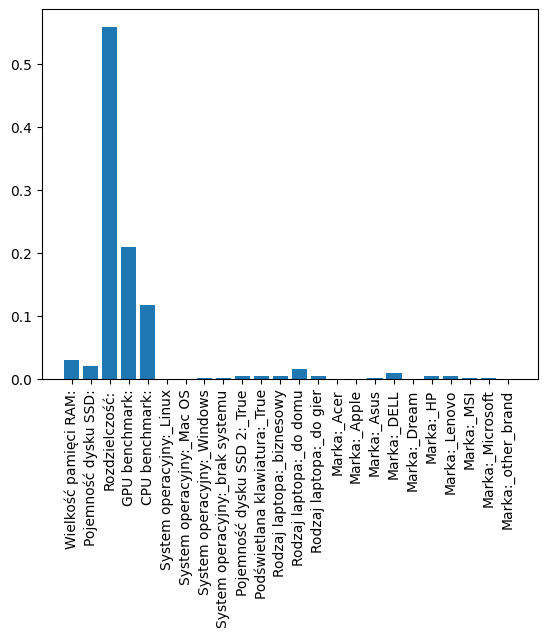

In [ ]:
x_bar = np.concatenate([scaler_x.get_feature_names_out(), ohe.get_feature_names_out()])
y_bar = tree_grid.best_estimator_.feature_importances_
plt.bar(x_bar, 
        y_bar)

plt.xticks(rotation=90)